<a href="https://colab.research.google.com/github/acubillosunal/UBM-DEEP-LEARNING-1/blob/main/U2.03%20-%20Overfitting%20and%20regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Recuerda que una vez abierto, Da clic en "Copiar en Drive", de lo contrario no podras almancenar tu progreso**

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.



In [37]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/acubillosunal/UBM-DEEP-LEARNING-1/main/init.py
import init; init.init(force_download=False); 

In [38]:
%matplotlib inline

## **Overfitting**

El sobreajuste (overfitting) es un fenómeno en el que un modelo estadístico o de aprendizaje automático "memoriza" los datos en el conjunto de entrenamiento, pero no puede capturar la estructura subyacente de los datos, por lo que no puede **generalizar** correctamente y realiza malas predicciones.

El comportamiento opuesto al sobreajuste es el **desajuste**; en este caso el modelo no se puede ajustar a los datos de entrenamiento y también produce malas predicciones. Tampoco el sobreajuste o el desajuste son un comportamiento deseable.

Para identificar si un modelo sufre sobreajuste, es necesario que durante la fase de validación se estimen tanto las medidas de rendimiento del entrenamiento como las de las pruebas.

None


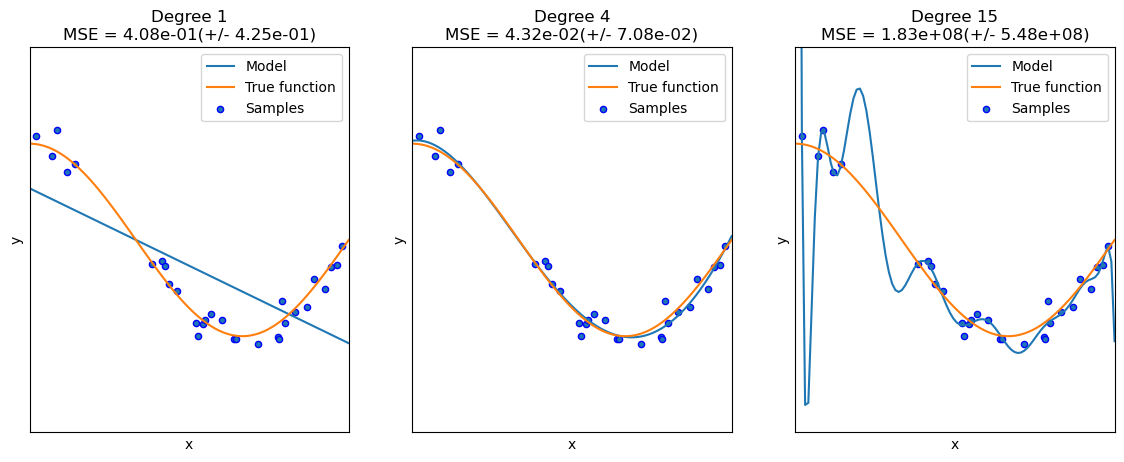

In [39]:
import sys
sys.path.insert(0, './local/lib/')
import regularization as reg
reg.PrintOverfittingReg()

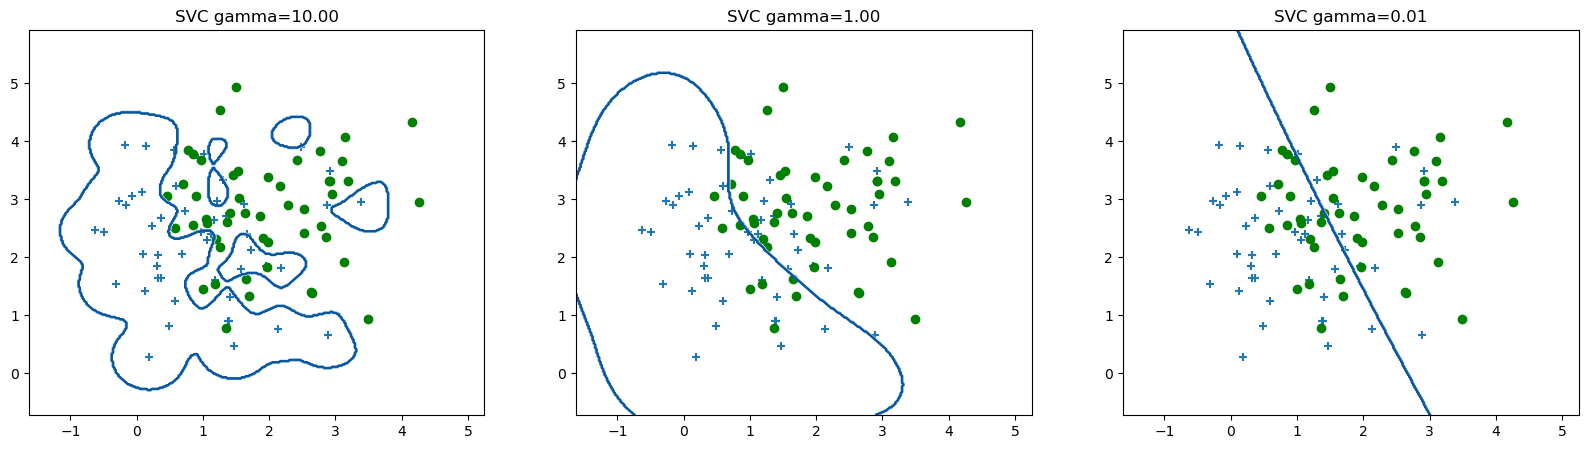

In [40]:
reg.PrintOverfittingClassify()

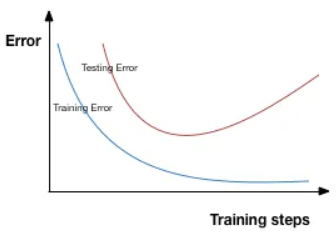

In [41]:
from IPython.display import Image

Image(filename='local/imgs/overfitting.png')

Las causas del sobreajuste son principalmente:

- Datos ruidosos combinados con un modelo complejo (un modelo con una gran cantidad de parámetros)

- Un pequeño conjunto de datos con una gran cantidad de variables (la maldición de la dimensionalidad).

Para evitar el sobreajuste, existen principalmente dos estrategias que se pueden utilizar, incluso de forma conjunta. De cualquier manera, siempre es importante realizar una correcta validación de los modelos, utilizando tres divisiones del conjunto de datos: **entrenamiento**, **validación (también llamada desarrollo)** y **prueba**. El conjunto de prueba debe usarse únicamente para estimar el error cometido por el sistema y nunca para entrenamiento, selección de modelo o ajuste de hiperparámetros. De esta forma vamos a estimar la capacidad real de generalización de los modelos.


### **Early Stopping**

En el aprendizaje profundo, siempre utilizamos modelos que están muy sobreparametrizados: tienen muchos más grados de libertad que el mínimo necesario para ajustarse a la variedad latente de datos. Esta parametrización excesiva no es un problema, porque nunca se ajusta completamente a un modelo de aprendizaje profundo. Un ajuste así no sería generalizable en absoluto. Siempre interrumpirás el entrenamiento mucho antes de alcanzar la mínima pérdida de entrenamiento posible.
Encontrar el punto exacto durante el entrenamiento en el que se ha alcanzado el ajuste más generalizable (el límite exacto entre una curva de bajo ajuste y una curva de sobreajuste) es una de las cosas más efectivas que puedes hacer para mejorar la generalización.

En los ejemplos del capítulo anterior, comenzaríamos entrenando nuestros modelos durante más tiempo del necesario para determinar la cantidad de épocas que produjeron las mejores métricas de validación, y luego volveríamos a entrenar un nuevo modelo exactamente para esa cantidad de épocas. Esto es bastante estándar, pero requiere que usted haga trabajo redundante, lo que a veces puede resultar costoso. Naturalmente, puedes guardar tu modelo al final de cada época y, una vez que hayas encontrado la mejor época, reutilizar el modelo guardado más cercano que tengas.
En Keras, es típico hacer esto con una devolución de llamada EarlyStopping, que interrumpirá el entrenamiento tan pronto como las métricas de validación dejen de mejorar, mientras recuerda el
estado modelo más conocido.

Esta es una estrategia para evitar el sobreajuste en modelos paramétricos, como ANN, donde el error de validación se utiliza como criterio de parada. Si el error de validación comienza a aumentar, no importa si el error de entrenamiento continúa disminuyendo, el algoritmo detiene el proceso de entrenamiento.

En keras, la parada anticipada se implementa mediante una función de callback. Se debe pasar una instancia de la clase EarlyStopping al método de ajuste.

In [42]:
earlystopping = keras.callbacks.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

model.fit(...., callbacks=[earlystopping])

SyntaxError: invalid syntax (952886679.py, line 3)

El parámetro **patience** le da al algoritmo de entrenamiento una ventana de iteración para mejorar nuevamente la medida de rendimiento antes de detener el proceso de entrenamiento.

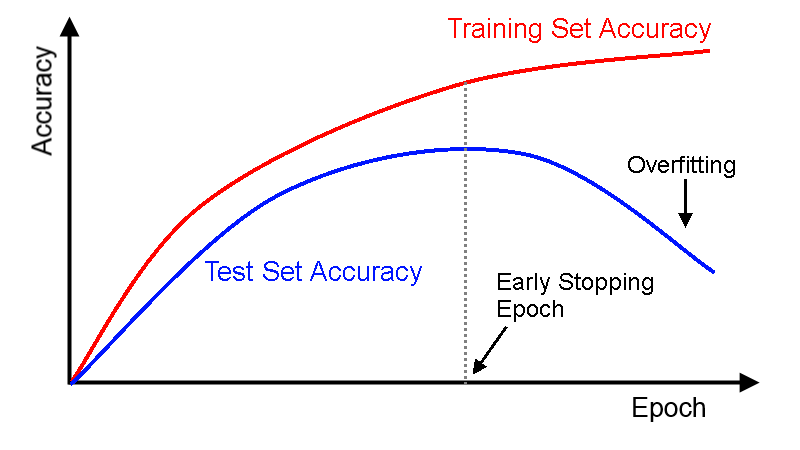

In [ ]:
Image(filename='local/imgs/ParadaAnticipada.png')

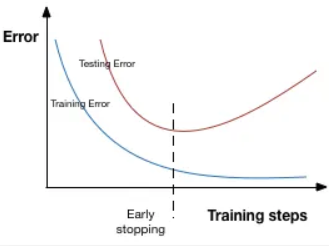

In [ ]:
Image(filename='local/imgs/early_stopping.png')

## Regularization

En el aprendizaje automático y los problemas inversos, la regularización es el proceso matemático de agregar información para resolver un problema mal planteado o evitar un sobreajuste. La regularización se aplica a funciones objetivo en problemas de optimización mal planteados.

Un problema matemático o una serie de ecuaciones están mal condicionados si un pequeño cambio en la variable independiente (entrada) conduce a un gran cambio en la variable dependiente (salida). Esto puede conducir a problemas computacionales. Por ejemplo, si un sistema de ecuaciones está mal condicionado, la solución existe, pero es muy difícil de encontrar.

En el caso de una regresión polinomial, el sobreajuste conduce a un incremento de magnitud de los pesos del polinomio. Por lo tanto, la regularización se puede implementar como un término de restricción en la función de pérdida:

$$E({\bf{w}}) = \frac{1}{2}\sum_{i=1}^{N}\left( y_i - f({\bf{x}}_i,{\bf{w}})\right) ^2 + \frac{\lambda}{2}\|{\bf{w}}\|^2$$


The larger $\lambda$, the higher the penalization due the complexity of the model.

Give a training set $\mathcal{D} = \{({\bf{x}}_i,y_i)\}_{i=1}^{N}$, being ${\bf{x}}_i$ the feature vector representing the sample $i$, and $y_i$ its corresponding target value,  the equation for weights update is given by:
$$w_j = w_j - \eta \left( \lambda w_j + \sum_{i=1}^{N} \left( f({\bf{x}}_i,{\bf{w}}) - y_i\right)x_{ij} \right)  $$

An analytical equivalent expression for the regularized multiple regression is given by:
$${\bf{w}} = \left( {\bf{X}}^T {\bf{X}} + \lambda {\bf{I}} \right)^{-1} {\bf{X}}^T {\bf{Y}}$$

For the logistic regression, the regularization can be derived straightforwardly:

$$w_j = w_j - \eta \left( \lambda w_j + \sum_{i=1}^{N} \left( g\left(f({\bf{x}}_i,{\bf{w}})\right) - y_i\right)x_{ij} \right)  $$

where $g(\cdot)$ is the logistic function

Lets see an example:

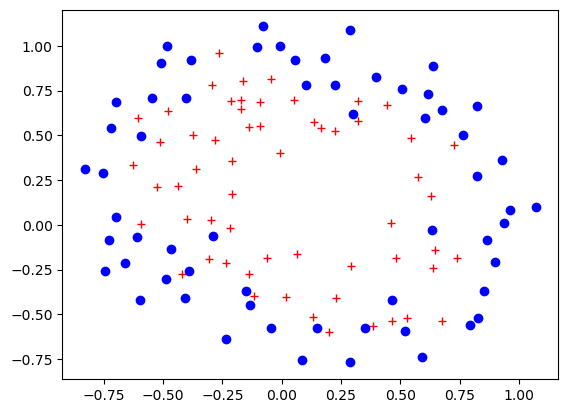

In [7]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
data = np.genfromtxt("local/data/ex2data2.txt",delimiter=",")
X = data[:, [0, 1]]; Y = data[:, 2];
plt.plot(X[Y.flat==1,0],X[Y.flat==1,1],'r+')
plt.plot(X[Y.flat==0,0],X[Y.flat==0,1],'bo')

El siguiente es el límite obtenido para un polinomio de grado 6.

Error= 0.1792483974074213


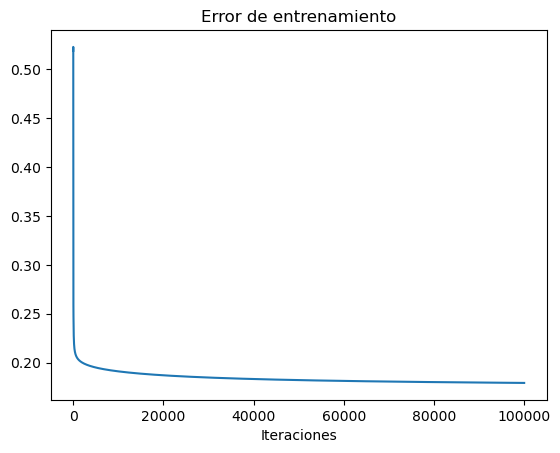

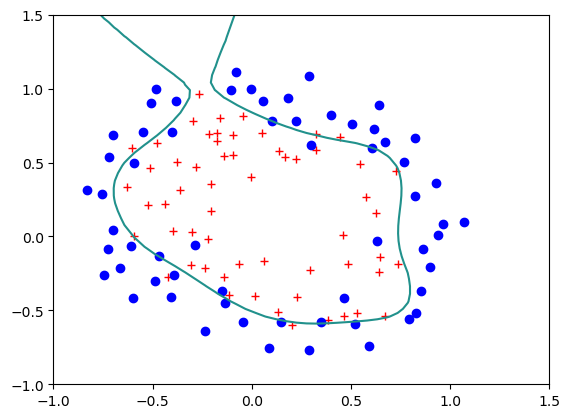

In [ ]:
reg.StandardLogisticRegression(X,Y)

Lets try the regulirized version for $\lambda=0.1$:

Error= 0.2507583326384995


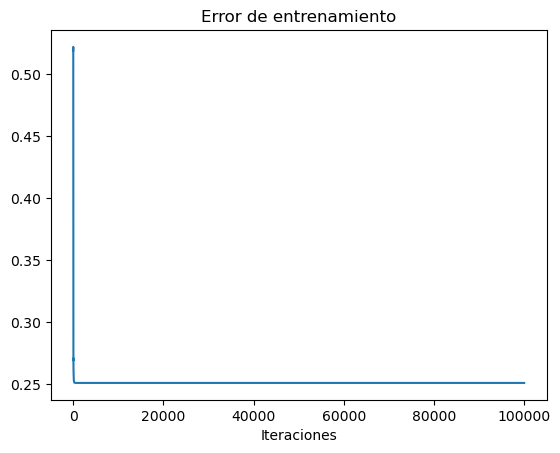

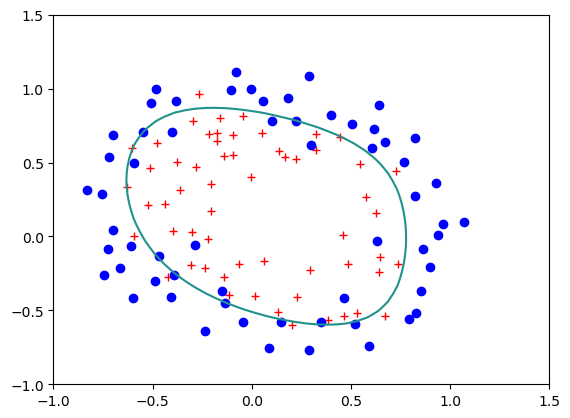

In [ ]:
reg.StandardLogisticRegression(X,Y,lam=0.1)

Error= 0.3360451807677179


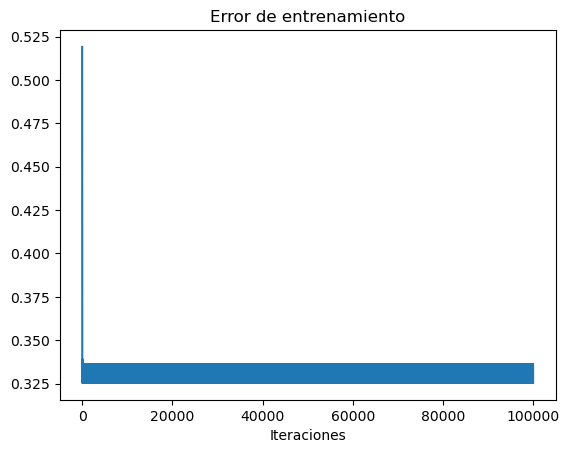

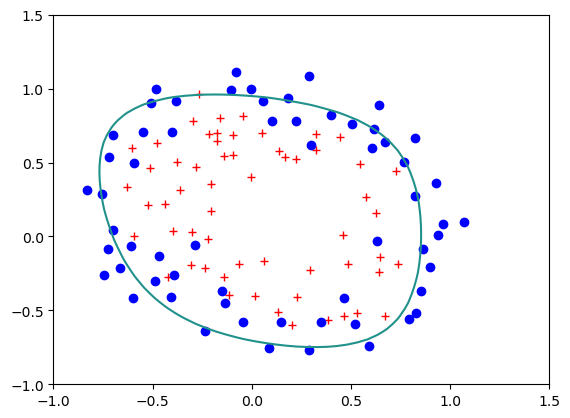

In [ ]:
reg.StandardLogisticRegression(X,Y,lam=0.5)

Error= 0.39341073848662345


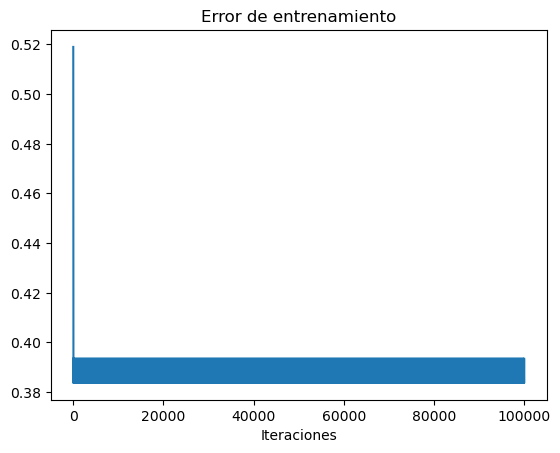

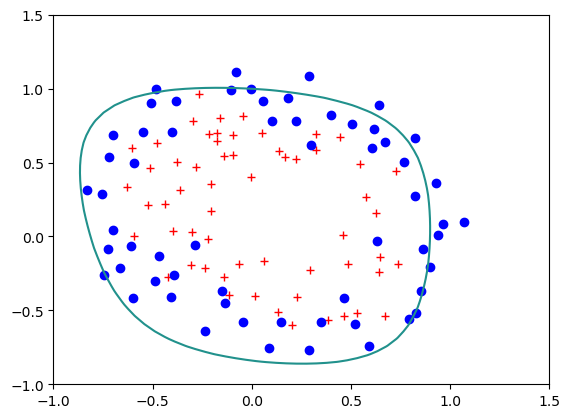

In [ ]:
reg.StandardLogisticRegression(X,Y,lam=1)

El término de restricción utilizado en la función de pérdida anterior corresponde a la norma $L_2$ del vector $\bf{w}$. Esta técnica también se llama **regresión de ridge**. Es posible utilizar otras normas, por ejemplo, si el término de regularización usa la norma $L_1$, la técnica se conoce como LASSO, que significa *Least Absolute Shrinkage and Selection Operator* por sus siglas en inglés. La idea detrás de LASSO es la misma que en la regresión de ridge, sin embargo, debido a la norma $ L_1 $, la magnitud de los pesos no solo está limitada sino que algunos de los pesos se vuelven 0.

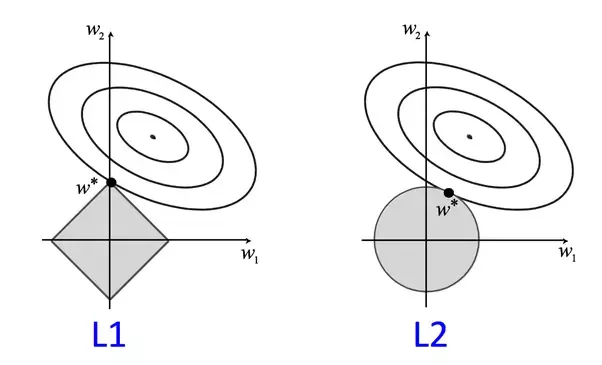

In [ ]:
from IPython.display import Image
Image(filename='local/imgs/L1L2.png')

In [ ]:
from sklearn import linear_model, datasets
diabetes=datasets.load_diabetes()
print(diabetes.data)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]


In [ ]:
clf=linear_model.Lasso(alpha=0.5)
clf.fit(diabetes.data,diabetes.target)
print(clf.coef_)

[  0.          -0.         471.04187427 136.50408382  -0.
  -0.         -58.31901693   0.         408.0226847    0.        ]


## **Técnicas de Regularización**

Las *técnicas de regularización* son un conjunto de mejores prácticas que impiden activamente la capacidad del modelo para ajustarse perfectamente a los datos de entrenamiento, con el objetivo de hacer que el modelo funcione mejor durante la validación. A esto se le llama “regularizar” el modelo, porque tiende a hacerlo más simple, más “regular”, su curva más suave, más “genérica”; por lo tanto es menos
específico para el conjunto de entrenamiento y más capaz de generalizar al aproximarse más a la variedad latente de los datos.

Tenga en cuenta que regularizar un modelo es un proceso que siempre debe estar guiado por un procedimiento de evaluación preciso. Sólo lograrás la generalización si puedes medirlo.

Repasemos algunas de las técnicas de regularización más comunes y apliquémoslas.
en la práctica para mejorar el modelo de clasificación de películas.

* Un modelo demasiado pequeño puede no ser efectivo; se necesita encontrar un equilibrio entre capacidad y recursos de memorización.
* Reducir el tamaño del modelo implica disminuir la cantidad de parámetros, determinada por la cantidad de capas y unidades por capa.
* Los modelos con recursos de memorización limitados deben aprender representaciones comprimidas para minimizar la pérdida y tener poder predictivo.
* Es crucial que el modelo tenga suficientes parámetros para no carecer de recursos de memorización.
* No existe una fórmula mágica para determinar el número correcto de capas o el tamaño adecuado para cada capa.
* Se recomienda evaluar diferentes arquitecturas en un conjunto de validación para encontrar el tamaño óptimo del modelo.
* El flujo de trabajo para encontrar el tamaño adecuado del modelo implica comenzar con un modelo relativamente pequeño y aumentar su tamaño gradualmente hasta que se observe un rendimiento decreciente en la pérdida de validación.

In [11]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

(train_data, train_labels), _ = imdb.load_data(num_words=10000)
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

train_data = vectorize_sequences(train_data)

In [12]:
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

def plot_accuracy(acc,val_acc):
  # Plot training & validation accuracy values
  plt.figure()
  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

### **Modelo Original**

In [13]:
model = Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
    ])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.5666 - accuracy: 0.7451 - val_loss: 0.4292 - val_accuracy: 0.8641
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3489 - accuracy: 0.8878 - val_loss: 0.3420 - val_accuracy: 0.8697
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2554 - accuracy: 0.9133 - val_loss: 0.3134 - val_accuracy: 0.8721
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2051 - accuracy: 0.9308 - val_loss: 0.2792 - val_accuracy: 0.8870
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1715 - accuracy: 0.9441 - val_loss: 0.2799 - val_accuracy: 0.8860
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1444 - accuracy: 0.9530 - val_loss: 0.2921 - val_accuracy: 0.8859
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1240 - accuracy: 0.9619 - val_loss: 0.3164 - val_accuracy: 0.8780
Epoch 8/20
30

### **Versión del modelo con baja capacidad**

In [14]:
model = Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
    ])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 40ms/step - loss: 0.6059 - accuracy: 0.7281 - val_loss: 0.5140 - val_accuracy: 0.8302
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.4547 - accuracy: 0.8705 - val_loss: 0.4215 - val_accuracy: 0.8649
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3668 - accuracy: 0.8924 - val_loss: 0.3624 - val_accuracy: 0.8767
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3070 - accuracy: 0.9066 - val_loss: 0.3259 - val_accuracy: 0.8823
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2641 - accuracy: 0.9177 - val_loss: 0.3042 - val_accuracy: 0.8865
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2310 - accuracy: 0.9287 - val_loss: 0.2873 - val_accuracy: 0.8913
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2049 - accuracy: 0.9353 - val_loss: 0.3016 - val_accuracy: 0.8759
Epoch 8/20
30

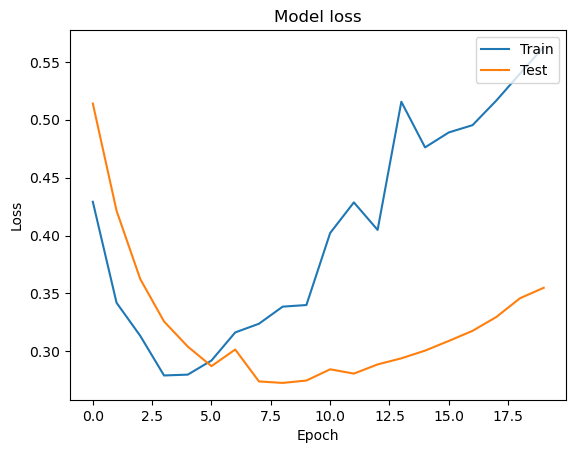

In [15]:
history_original.history.keys()
plot_loss(history_original.history['val_loss'], history_smaller_model.history['val_loss'])


### **Ejercicio en clase**

Graficar la curva de epochs vs accuracy

### **Versión del modelo con alta capacidad**

In [20]:
model = Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs = 20, batch_size = 512, validation_split = 0.4)

Epoch 1/20
30/30 [==============================] - 5s 153ms/step - loss: 0.5769 - accuracy: 0.7195 - val_loss: 0.3687 - val_accuracy: 0.8513
Epoch 2/20
30/30 [==============================] - 3s 105ms/step - loss: 0.3257 - accuracy: 0.8706 - val_loss: 0.2875 - val_accuracy: 0.8833
Epoch 3/20
30/30 [==============================] - 3s 108ms/step - loss: 0.2386 - accuracy: 0.9038 - val_loss: 0.2767 - val_accuracy: 0.8866
Epoch 4/20
30/30 [==============================] - 3s 107ms/step - loss: 0.2015 - accuracy: 0.9205 - val_loss: 0.3138 - val_accuracy: 0.8679
Epoch 5/20
30/30 [==============================] - 3s 115ms/step - loss: 0.1482 - accuracy: 0.9429 - val_loss: 0.2778 - val_accuracy: 0.8879
Epoch 6/20
30/30 [==============================] - 3s 104ms/step - loss: 0.1085 - accuracy: 0.9646 - val_loss: 0.3304 - val_accuracy: 0.8837
Epoch 7/20
30/30 [==============================] - 3s 109ms/step - loss: 0.0961 - accuracy: 0.9722 - val_loss: 0.3769 - val_accuracy: 0.8779
Epoch 

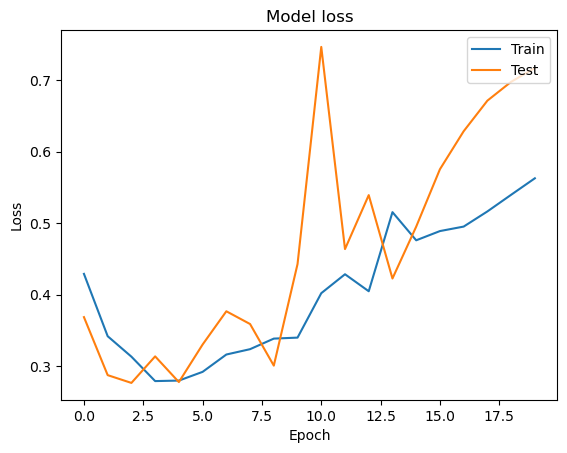

In [21]:
plot_loss(history_original.history['val_loss'], history_larger_model.history['val_loss'])

### **Agregando pesos a la regularización**

#### **Agregando pesos con regularización L2 en el modelo**

In [ ]:
from tensorflow.keras import regularizers

model = Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

2024-03-15 12:53:41.939372: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-15 12:53:41.940380: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/20


2024-03-15 12:53:42.677309: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 600000000 exceeds 10% of free system memory.


30/30 [==============================] - 2s 46ms/step - loss: 0.6258 - accuracy: 0.7645 - val_loss: 0.4925 - val_accuracy: 0.8629
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.4239 - accuracy: 0.8868 - val_loss: 0.4091 - val_accuracy: 0.8757
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3425 - accuracy: 0.9110 - val_loss: 0.3694 - val_accuracy: 0.8821
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3023 - accuracy: 0.9227 - val_loss: 0.3642 - val_accuracy: 0.8821
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2776 - accuracy: 0.9324 - val_loss: 0.3664 - val_accuracy: 0.8816
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2588 - accuracy: 0.9397 - val_loss: 0.3548 - val_accuracy: 0.8871
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2521 - accuracy: 0.9385 - val_loss: 0.3582 - val_accuracy: 0.8852
Epoch 8/20
30/30 [======

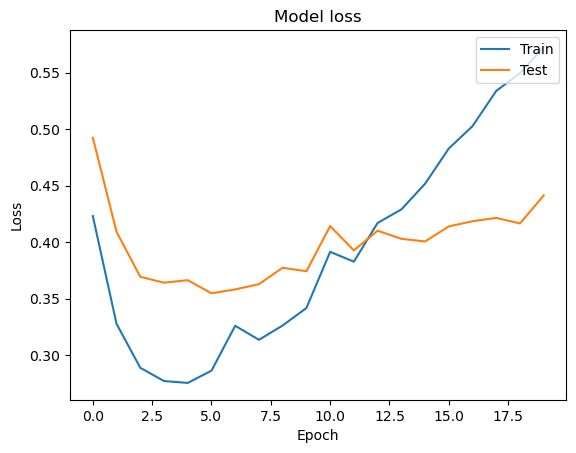

In [ ]:
plot_loss(history_original.history['val_loss'], history_l2_reg.history['val_loss'])

#### **Agregando pesos con regularización L1 en el modelo**

In [ ]:
from tensorflow.keras import regularizers

model = Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l1(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l1(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l1_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20


2024-03-15 12:58:21.554077: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 600000000 exceeds 10% of free system memory.


30/30 [==============================] - 2s 44ms/step - loss: 1.5694 - accuracy: 0.6691 - val_loss: 0.9136 - val_accuracy: 0.7806
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.8766 - accuracy: 0.7937 - val_loss: 0.8543 - val_accuracy: 0.7961
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.8237 - accuracy: 0.8145 - val_loss: 0.8087 - val_accuracy: 0.8350
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.7802 - accuracy: 0.8297 - val_loss: 0.7708 - val_accuracy: 0.8367
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.7455 - accuracy: 0.8384 - val_loss: 0.7674 - val_accuracy: 0.8204
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.7203 - accuracy: 0.8453 - val_loss: 0.7315 - val_accuracy: 0.8442
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.7046 - accuracy: 0.8453 - val_loss: 0.7076 - val_accuracy: 0.8456
Epoch 8/20
30/30 [======

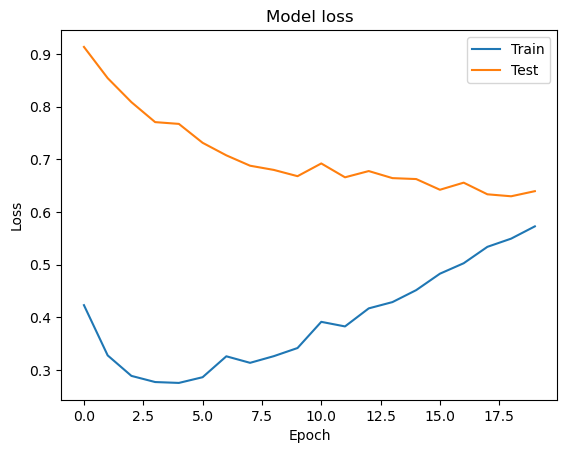

In [ ]:
plot_loss(history_original.history['val_loss'], history_l1_reg.history['val_loss'])

#### **Diferentes pesos disponibles para la regularización en Keras**

In [ ]:
from tensorflow.keras import regularizers

regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

### **Agregando dropout**

El dropout es una de las técnicas de regularización más efectivas y más utilizadas para redes neuronales; Fue desarrollado por Geoff Hinton y sus estudiantes de la Universidad de Toronto. La eliminación, aplicada a una capa, consiste en eliminar aleatoriamente (establecer en cero) una serie de características de salida de la capa durante el entrenamiento. Digamos que una capa determinada normalmente devolvería un vector [0.2, 0.5, 1.3, 0.8, 1.1] para una muestra de entrada determinada durante el entrenamiento. Después de aplicar la eliminación, este vector tendrá algunas entradas cero distribuidas aleatoriamente: por ejemplo, [0, 0,5, 1,3, 0, 1,1]. La tasa de dropout es la fracción de las funciones que se eliminan a cero; normalmente se establece entre 0,2 y 0,5.

En el momento de la prueba, no se abandona ninguna unidad; en cambio, los valores de salida de la capa se reducen mediante un factor igual a la tasa de abandono, para equilibrar el hecho de que se utilizan más unidades.
activo que en el momento del entrenamiento.

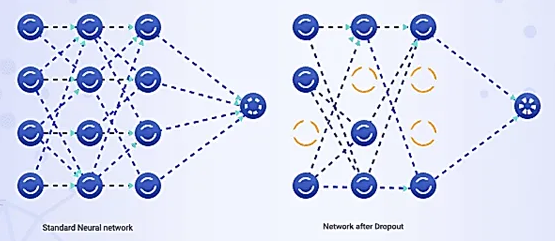

In [ ]:
Image(filename='local/imgs/dropout.png')

Cuando usamos la capa Dropout en una red neuronal, elimina aleatoriamente algunos nodos durante el entrenamiento para evitar el sobreajuste. Sin embargo, durante la inferencia (es decir, hacer predicciones sobre datos nuevos), queremos utilizar todos los nodos de la red neuronal para realizar predicciones precisas.

Para lograr esto, la capa Dropout tiene un parámetro llamado entrenamiento que determina si la capa debe eliminar nodos o no. Cuando el entrenamiento se establece en Verdadero, la capa de abandono eliminará nodos aleatoriamente como de costumbre. Cuando el entrenamiento se establece en Falso, la capa de abandono no eliminará ningún nodo y, en su lugar, utilizará todos los nodos de la red neuronal para realizar predicciones.

Cuando utilizamos el método de ajuste de un modelo de Keras para entrenar el modelo, Keras establece automáticamente el entrenamiento en Verdadero durante el entrenamiento y en Falso durante la inferencia, por lo que no tenemos que preocuparnos por eso.

Sin embargo, si usamos la capa de abandono en algún otro contexto (por ejemplo, creando una capa o modelo personalizado), debemos configurar el entrenamiento explícitamente en Verdadero o Falso dependiendo de si queremos eliminar nodos o no.

In [46]:
data = np.arange(10).reshape(5, 2).astype(np.float32)
data

array([[0., 1.],
       [2., 3.],
       [4., 5.],
       [6., 7.],
       [8., 9.]], dtype=float32)

In [56]:
layer = layers.Dropout(0.2, input_shape = (2,))
outputs = layer(data, training = True)
outputs

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[ 0.  ,  1.25],
       [ 0.  ,  3.75],
       [ 5.  ,  6.25],
       [ 7.5 ,  8.75],
       [10.  , 11.25]], dtype=float32)>

#### **Agregando dropout a el modelo IMDB**

In [48]:
model = Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.6442 - accuracy: 0.6148 - val_loss: 0.5362 - val_accuracy: 0.8322
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.5285 - accuracy: 0.7657 - val_loss: 0.4276 - val_accuracy: 0.8725
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.4482 - accuracy: 0.8167 - val_loss: 0.3599 - val_accuracy: 0.8806
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3797 - accuracy: 0.8558 - val_loss: 0.3382 - val_accuracy: 0.8763
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3378 - accuracy: 0.8834 - val_loss: 0.2949 - val_accuracy: 0.8886
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3004 - accuracy: 0.8975 - val_loss: 0.2852 - val_accuracy: 0.8878
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2703 - accuracy: 0.9157 - val_loss: 0.2876 - val_accuracy: 0.8882
Epoch 8/20
30

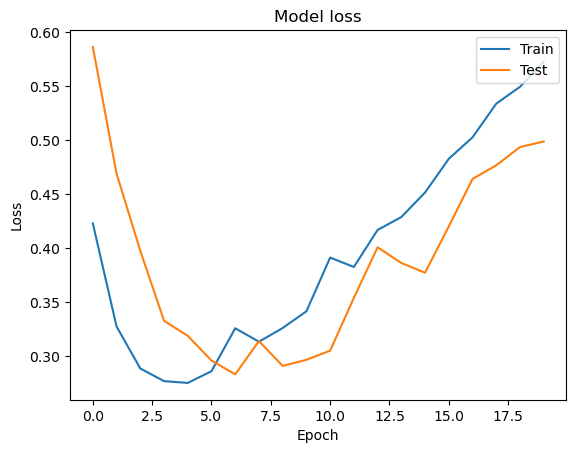

In [15]:
plot_loss(history_original.history['val_loss'], history_dropout.history['val_loss'])

In [9]:
from tensorflow.keras import regularizers

model = Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.7268 - accuracy: 0.6174 - val_loss: 0.6344 - val_accuracy: 0.8415
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.6124 - accuracy: 0.7349 - val_loss: 0.5209 - val_accuracy: 0.8547
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.5320 - accuracy: 0.8002 - val_loss: 0.4406 - val_accuracy: 0.8793
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.4734 - accuracy: 0.8395 - val_loss: 0.3942 - val_accuracy: 0.8830
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.4282 - accuracy: 0.8712 - val_loss: 0.3846 - val_accuracy: 0.8842
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3906 - accuracy: 0.8937 - val_loss: 0.3627 - val_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3718 - accuracy: 0.9031 - val_loss: 0.3645 - val_accuracy: 0.8889
Epoch 8/20
30

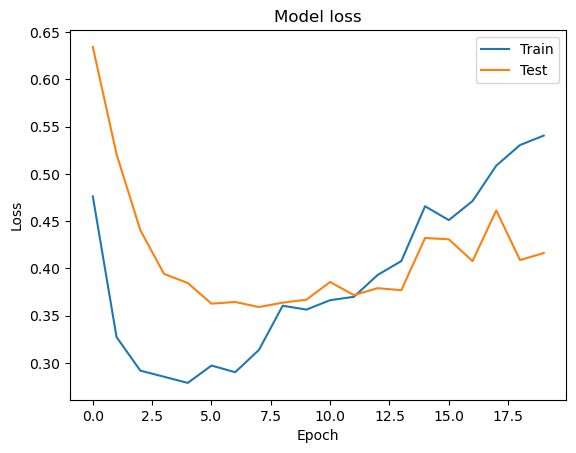

In [10]:
plot_loss(history_original.history['val_loss'], history_l2_reg_dropout.history['val_loss'])

En resumen, estas son las formas más comunes de maximizar la generalización y prevenir
sobreajuste en redes neuronales:
* Obtenga más datos de entrenamiento o mejores datos de entrenamiento.
* Desarrollar mejores características.
* Reducir la capacidad del modelo.
* Añadir regla de peso